In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from skimage import io
import glob
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import datetime 
import os
%load_ext tensorboard

In [2]:
## reading all the data from file ###
## only needed if images.npy and labels.npy are not available ####
#  alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','R','S','T','U','V','W','X','Z']
#  for i in range(24):
#      alphabet[i]=alphabet[i].lower()
#  alphabet_size=len(alphabet)
#  images = np.zeros((46000,40,30,3))
#  labels = np.zeros((46000,1))
#  counter=0
#  j=0
#  index=0
#  for filename in glob.glob('G:\labeled-2k/*/*.jpg'):
#      im = io.imread(filename)
#      images[index,:,:,:]=im
#      labels[index,:]=alphabet.index(filename[14])
#      counter+=1
#      index+=1
#      if(counter==1999):
#          print(alphabet[j])
#          j+=1
#          counter=0
images=np.load("images_3D.npy")
labels=np.load("labels_3D.npy")

In [3]:
alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','R','S','T','U','V','W','X','Z']
list_1=images/255.0
list_2=labels
list_1, list_2 = shuffle(list_1, list_2)
x_train=list_1[0:int(len(list_1)*0.7)]
y_train=list_2[0:int(len(list_1)*0.7)]
x_test=list_1[int(len(list_1)*0.7):]
y_test=list_2[int(len(list_1)*0.7):]
# np.save('images_3D', images)
# np.save('labels_3D', labels)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(40,30,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(len(alphabet), activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 38, 28, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 4, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [21]:
log_dir='.\\logs'
print(log_dir)
callbackObj = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
model.fit(x_train,y_train,epochs=12,validation_split=0.2,callbacks=[callbackObj])

.\logs
Train on 25759 samples, validate on 6440 samples
Epoch 1/12
25759/25759 [==============================] - 8s 326us/sample - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.0215 - val_accuracy: 0.9966
Epoch 2/12
25759/25759 [==============================] - 8s 316us/sample - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0141 - val_accuracy: 0.9967
Epoch 3/12
25759/25759 [==============================] - 8s 320us/sample - loss: 4.1396e-05 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9972
Epoch 4/12
25759/25759 [==============================] - 8s 315us/sample - loss: 1.4115e-05 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9978
Epoch 5/12
25759/25759 [==============================] - 8s 317us/sample - loss: 5.0058e-06 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9977
Epoch 6/12
25759/25759 [==============================] - 8s 319us/sample - loss: 3.0324e-06 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9978
Epoch 7/12
25759/25759 [====

In [14]:
loss,acc=model.evaluate(x_test,y_test)

13801/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy on test set = %99.73190426826477


'L'

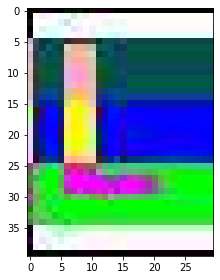

In [15]:
print("accuracy on test set = %"+str(acc*100))
pred = model.predict(x_test)
i=214
io.imshow(x_test[i])
alphabet[np.argmax(pred[i])]

total accuracy on 5 letter captcha = %98.6666896298109


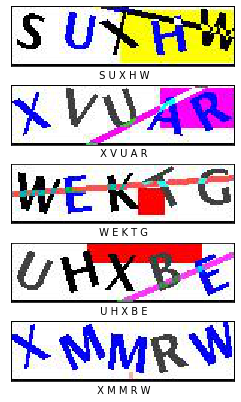

In [16]:
# working with complete examples
samples = np.zeros((5,40,150,3))
indx=0
for filename in glob.glob('./samples/*.jpg'):
    samples[indx,:,:,:]=(io.imread(filename))
    indx+=1
def split_cross (img):
    samples=np.zeros((5,40,30,3))
    indx=0
    for i in range (0,121,30):
        samples[indx,:,:,:] = img[:,i:i+30,:]
        indx+=1
    return samples
plt.figure(figsize=((4,7)))
for i in range(len(samples)):
    pred = model.predict(split_cross(samples[i]))
    plt.subplot(5,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(samples[i].astype(int),cmap=plt.cm.binary)
    string=""
    for j in range(len(pred)):
        string=string+" "+alphabet[np.argmax(pred[j])]
    plt.xlabel(string)
print("total accuracy on 5 letter captcha = %"+str((acc**5)*100))

In [17]:
model.save("captchaLearned"+str(acc*100))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: captchaLearned99.73190426826477\assets
